## Data Descripton:

In February 2020 nearly 65,000 developers in several IT fields responded to the annual survey from stack overflow, providing some important information such as there role and age and years of experience, as will as there salary, we will use this information in order to predict the annual salary for the model user.

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy import stats

## Loading Data:

In [2]:
df = pd.read_csv("survey_results_public.csv")

df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

## Data Preprocessing and Cleaning:

In [4]:
# Let's stsrt by selecting only the columns we want:

df = df[["EdLevel","Employment","LanguageWorkedWith","YearsCodePro","ConvertedComp"]]

df.head()

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,ConvertedComp
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",C#;HTML/CSS;JavaScript,27,NaN
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4,NaN
2,NaN,NaN,Objective-C;Python;Swift,NaN,NaN
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,4,NaN
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,HTML/CSS;Ruby;SQL,8,NaN


In [5]:
# Getting the number of columns and rows we have:

df.shape

(64461, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EdLevel             57431 non-null  object 
 1   Employment          63854 non-null  object 
 2   LanguageWorkedWith  57378 non-null  object 
 3   YearsCodePro        46349 non-null  object 
 4   ConvertedComp       34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


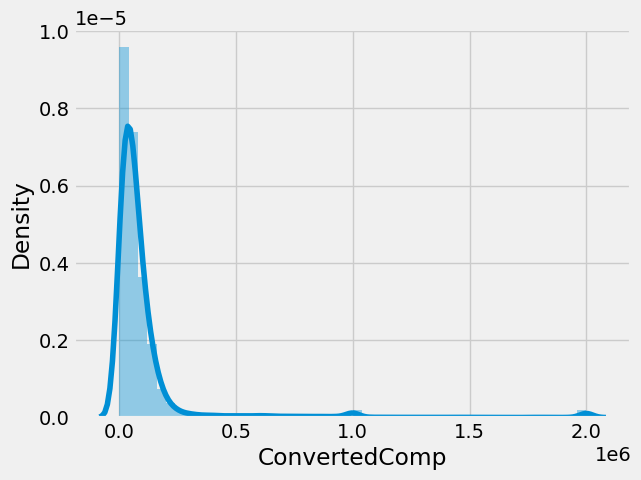

In [7]:
sns.distplot(df["ConvertedComp"]);

In [8]:
# Check for missing values:

df.isnull().sum()

EdLevel                7030
Employment              607
LanguageWorkedWith     7083
YearsCodePro          18112
ConvertedComp         29705
dtype: int64

As we see above, we have alot of missing values, We will replace the missing values in the first three columns with each column's mode, then we will check the distribution of the "YearsCodePro"column, And replace the mising values in the "ConvertedComp" column with it's median as we have a skewed distribution.

In [9]:
# Finding the mode value in the "EdLevel" column:
df["EdLevel"].mode()

0    Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Name: EdLevel, dtype: object

In [10]:
# Replacing the missing values in the "EdLevel" column with the mode:
df["EdLevel"].fillna("Bachelor’s degree (B.A., B.S., B.Eng., etc.)", inplace=True)

In [11]:
# Finding the mode value in the "Employment" column:
df["Employment"].mode()

0    Employed full-time
Name: Employment, dtype: object

In [12]:
# Replacing the missing values in the "Employment" column with the mode:
df["Employment"].fillna("Employment", inplace=True)

In [13]:
# Finding the mode value in the "Employment" column:
df["LanguageWorkedWith"].mode()

0    HTML/CSS;JavaScript;PHP;SQL
Name: LanguageWorkedWith, dtype: object

In [14]:
# Replacing the missing values in the "LanguageWorkedWith" column with the mode:
df["LanguageWorkedWith"].fillna("HTML/CSS;JavaScript;PHP;SQL", inplace=True)

In [15]:
# Finding the median value in the "ConvertedComp" column:
df["ConvertedComp"].median()

54049.0

In [16]:
# Replacing the missing values in the "ConvertedComp" column with the median:
df["ConvertedComp"].fillna(54049.0, inplace=True)

In [17]:
# Now let's get more details about the "YearsCodePro" column:
df["YearsCodePro"].value_counts()

3                     4815
2                     4814
5                     3978
4                     3716
1                     2818
6                     2741
10                    2735
8                     2234
7                     2229
Less than 1 year      2174
15                    1531
12                    1460
20                    1416
9                     1232
11                     947
13                     904
14                     758
16                     624
25                     583
18                     533
17                     475
22                     444
19                     373
30                     370
21                     341
23                     321
24                     259
26                     180
35                     162
27                     149
28                     128
32                     103
40                     101
33                      93
31                      80
34                      79
29                      72
3

In [18]:
# Replacing the string in the "YearsCodePro" column with string numbers:
df["YearsCodePro"].replace({"Less than 1 year":"1"},inplace=True)
df["YearsCodePro"].replace({"More than 50 years":"51"},inplace=True)

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


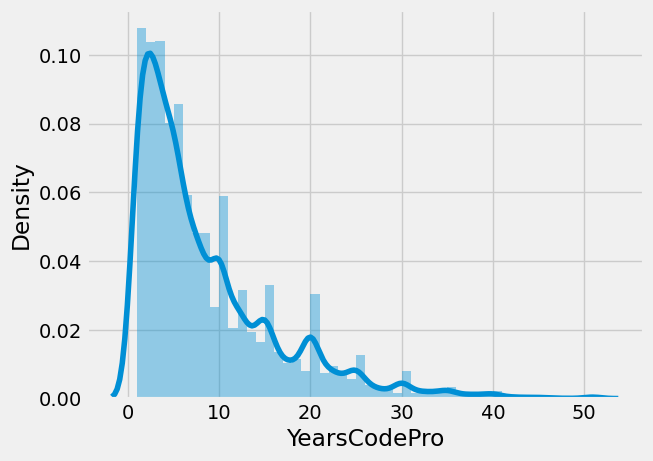

In [19]:
sns.distplot(df["YearsCodePro"]);

We will replace the mising values in the "YearsCodePro" column with it's median as we have a skewed distribution.

In [20]:
# Finding the median value in the "YearsCodePro" column:
df["YearsCodePro"].median()

6.0

In [21]:
# Replacing the missing values in the "LanguageWorkedWith" column with the mode:
df["YearsCodePro"].fillna(6.0, inplace=True)

In [22]:
# Converting the "YearsCodePro" from (object) datatype to (int) datatype: 
df["YearsCodePro"] = df["YearsCodePro"].astype(int)

# Now let's check columns datatypes again:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EdLevel             64461 non-null  object 
 1   Employment          64461 non-null  object 
 2   LanguageWorkedWith  64461 non-null  object 
 3   YearsCodePro        64461 non-null  int32  
 4   ConvertedComp       64461 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 2.2+ MB


In [23]:
# Now again let's get more details about the "YearsCodePro" column:
df["YearsCodePro"].value_counts()

6     20853
1      4992
3      4815
2      4814
5      3978
4      3716
10     2735
8      2234
7      2229
15     1531
12     1460
20     1416
9      1232
11      947
13      904
14      758
16      624
25      583
18      533
17      475
22      444
19      373
30      370
21      341
23      321
24      259
26      180
35      162
27      149
28      128
32      103
40      101
33       93
31       80
34       79
29       72
38       64
36       57
37       53
39       42
51       42
42       26
45       21
41       19
44       16
43       15
46        7
47        5
50        5
48        4
49        1
Name: YearsCodePro, dtype: int64

In [24]:
# Let's check again for missing values:

df.isnull().sum()

EdLevel               0
Employment            0
LanguageWorkedWith    0
YearsCodePro          0
ConvertedComp         0
dtype: int64

In [25]:
# Renaming the "ConvertedComp" salary:
df = df.rename({"ConvertedComp":"Salary"}, axis=1)

In [26]:
# Converting the "Salary" from (float) datatype to (int) datatype: 
df["Salary"] = df["Salary"].astype(float)
df.head(2)

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,Salary
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",C#;HTML/CSS;JavaScript,27,54049.0
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4,54049.0


In [27]:
df["LanguageWorkedWith_Count"] = df['LanguageWorkedWith'].str.count('\w+')

df.head()

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,Salary,LanguageWorkedWith_Count
0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",C#;HTML/CSS;JavaScript,27,54049.0,4
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4,54049.0,2
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employment,Objective-C;Python;Swift,6,54049.0,4
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employment,HTML/CSS;JavaScript;PHP;SQL,4,54049.0,5
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,HTML/CSS;Ruby;SQL,8,54049.0,4


In [28]:
# Now let's check columns datatypes again:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EdLevel                   64461 non-null  object 
 1   Employment                64461 non-null  object 
 2   LanguageWorkedWith        64461 non-null  object 
 3   YearsCodePro              64461 non-null  int32  
 4   Salary                    64461 non-null  float64
 5   LanguageWorkedWith_Count  64461 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.7+ MB


In [29]:
# Now let's get more details about the "Employment" column:

df["Employment"].value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Employment                                                607
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [30]:
# Cleaning the "Employment" column by droping rows we don't need


mask = df['Employment'] == 'Employment'
mask1 = df['Employment'] == 'Not employed, and not looking for work'
mask2 = df['Employment'] == 'Retired'

df = df[~mask]
df = df[~mask1]
df = df[~mask2]

C:\Users\User\AppData\Local\Temp\ipykernel_4152\3914002139.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~mask1]
C:\Users\User\AppData\Local\Temp\ipykernel_4152\3914002139.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~mask2]


In [31]:
# Now let's get more details about the "Employment" column again:

df["Employment"].value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Name: Employment, dtype: int64

In [32]:
df.describe()

,YearsCodePro,Salary,LanguageWorkedWith_Count
count,63289.000000,6.328900e+04,63289.000000
mean,7.854319,8.132989e+04,6.216151
std,6.802590,1.698757e+05,3.281694
min,1.000000,0.000000e+00,1.000000
25%,4.000000,4.864400e+04,4.000000
50%,6.000000,5.404900e+04,5.000000
75%,9.000000,5.945400e+04,8.000000
max,51.000000,2.000000e+06,29.000000


##### According to what we see from the "describe" method above, we have outliers in the numerical columns. We will delete these outliers because they will affect the model’s performance.

<AxesSubplot:ylabel='YearsCodePro'>

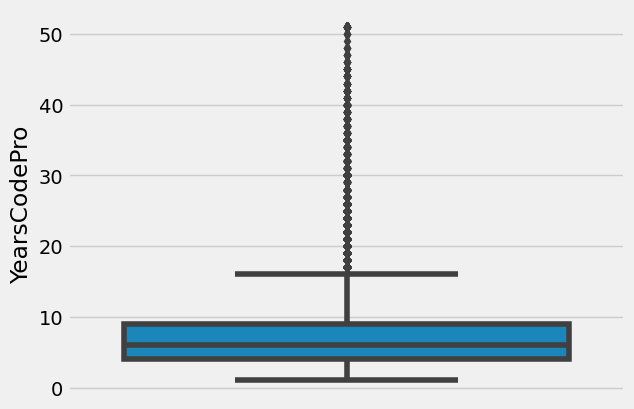

In [33]:
sns.boxplot(y=df['YearsCodePro'])

<AxesSubplot:ylabel='Salary'>

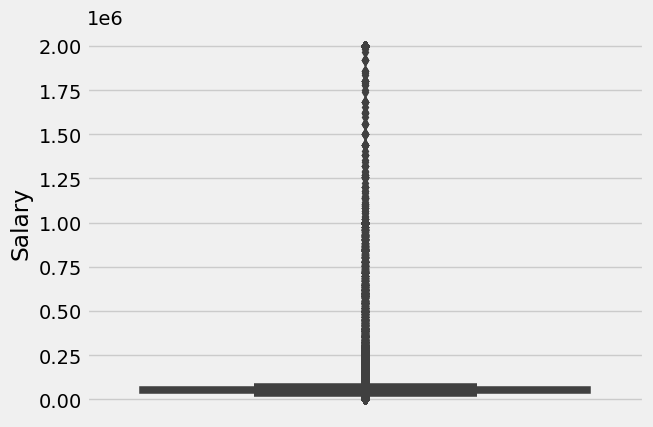

In [34]:
sns.boxplot(y=df['Salary'])

<AxesSubplot:ylabel='LanguageWorkedWith_Count'>

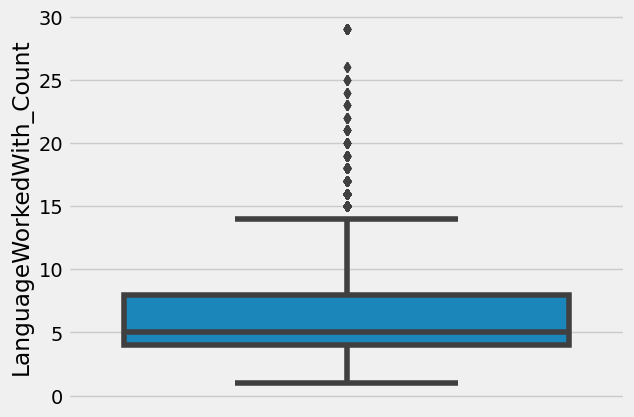

In [35]:
sns.boxplot(y=df['LanguageWorkedWith_Count'])

In [36]:
for x in ['YearsCodePro']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [37]:
for x in ['LanguageWorkedWith_Count']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [38]:
# calculate z-score for column A
z1 = np.abs(stats.zscore(df['Salary']))

# identify outliers
threshold = 3
outliers1 = df[z1 > threshold]


In [39]:
df = df.drop(outliers1.index)

In [40]:
df.isnull().sum()

EdLevel                        0
Employment                     0
LanguageWorkedWith             0
YearsCodePro                6425
Salary                         0
LanguageWorkedWith_Count    1105
dtype: int64

In [41]:
df = df.dropna(axis = 0)

In [42]:
df.isnull().sum()

EdLevel                     0
Employment                  0
LanguageWorkedWith          0
YearsCodePro                0
Salary                      0
LanguageWorkedWith_Count    0
dtype: int64

## Exploratory data analysis:

In [43]:
df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29387
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10714
Some college/university study without earning a degree                                 5916
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4246
Associate degree (A.A., A.S., etc.)                                                    1534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1190
Primary/elementary school                                                               830
Professional degree (JD, MD, etc.)                                                      633
I never completed any formal education                                                  389
Name: EdLevel, dtype: int64

In [44]:
df["Employment"].value_counts()

Employed full-time                                      38666
Student                                                  7571
Independent contractor, freelancer, or self-employed     4249
Not employed, but looking for work                       2306
Employed part-time                                       2047
Name: Employment, dtype: int64

In [45]:
df.describe().round()

,YearsCodePro,Salary,LanguageWorkedWith_Count
count,54839.0,54839.0,54839.0
mean,6.0,58232.0,6.0
std,3.0,48101.0,3.0
min,1.0,0.0,1.0
25%,3.0,44965.0,4.0
50%,6.0,54049.0,5.0
75%,7.0,54049.0,8.0
max,16.0,589920.0,14.0


In [46]:
df.head(2)

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,Salary,LanguageWorkedWith_Count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4.0,54049.0,2.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,HTML/CSS;Ruby;SQL,8.0,54049.0,4.0


##### The distrubtion of the Salary column:

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


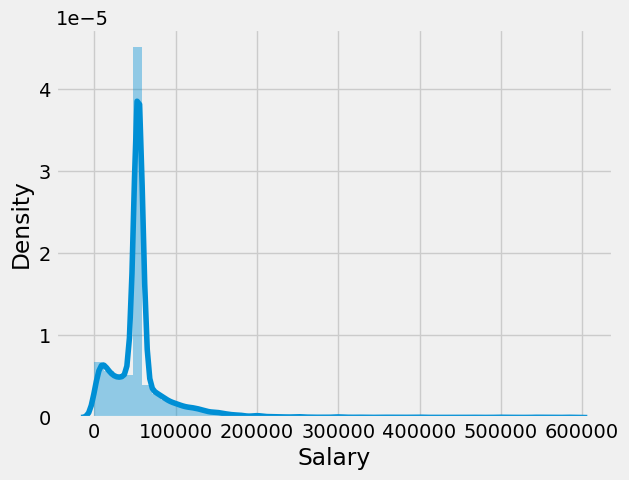

In [47]:
sns.distplot(df["Salary"]);

##### How many people of each education level are in the data set?

In [48]:
sns.set()

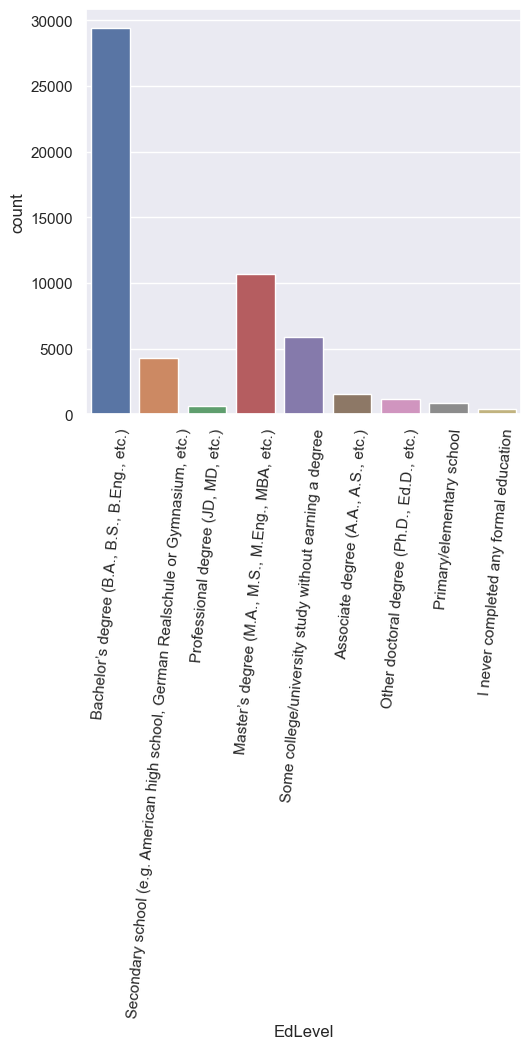

In [49]:
plt.figure(figsize=(5,5))
plt.xticks(rotation = 85)
sns.countplot(x="EdLevel", data=df);

##### What is the avarage salary for each education level?

In [50]:
df.head(2)

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,Salary,LanguageWorkedWith_Count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4.0,54049.0,2.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,HTML/CSS;Ruby;SQL,8.0,54049.0,4.0


In [51]:
ed_grp = df.groupby("EdLevel")
ed_sal_agg = ed_grp["Salary"].mean().round()

ed_sal_agg = ed_sal_agg.reset_index()

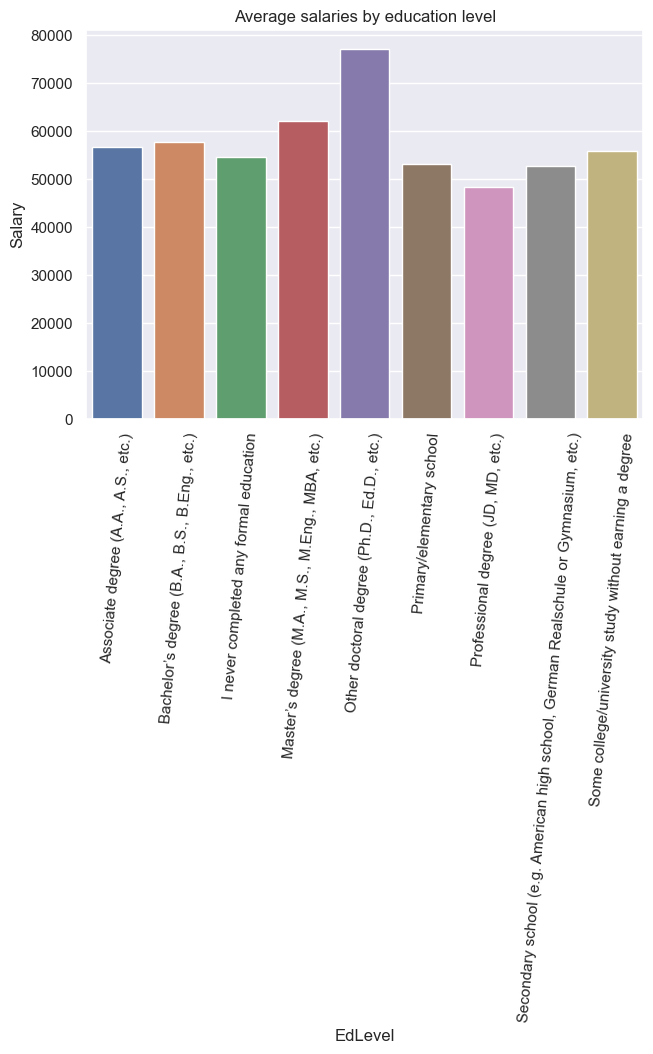

In [52]:
sns.barplot(x="EdLevel", y="Salary", data=ed_sal_agg)
plt.title("Average salaries by education level")
plt.xticks(rotation = 85);

##### What is the average years of experience for each educational level?

In [53]:
ed_exp_agg = ed_grp["YearsCodePro"].mean().round()

ed_exp_agg = ed_exp_agg.reset_index()

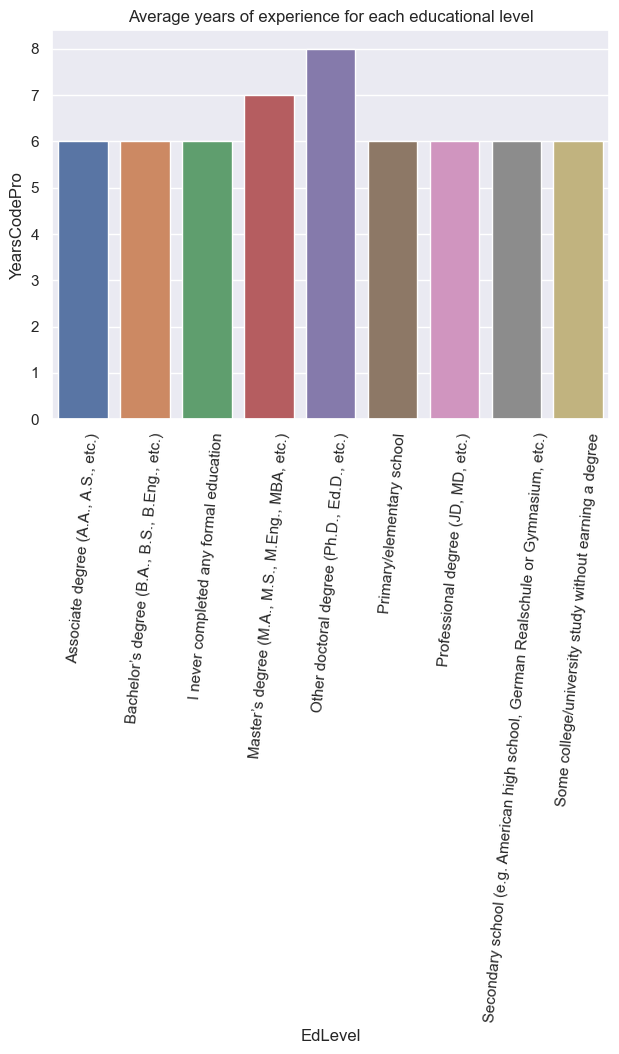

In [54]:
sns.barplot(x="EdLevel", y="YearsCodePro", data=ed_exp_agg)
plt.title("Average years of experience for each educational level")
plt.xticks(rotation = 85);

##### How many people do we have from each employment type?

In [55]:
df.head(2)

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,Salary,LanguageWorkedWith_Count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4.0,54049.0,2.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,HTML/CSS;Ruby;SQL,8.0,54049.0,4.0


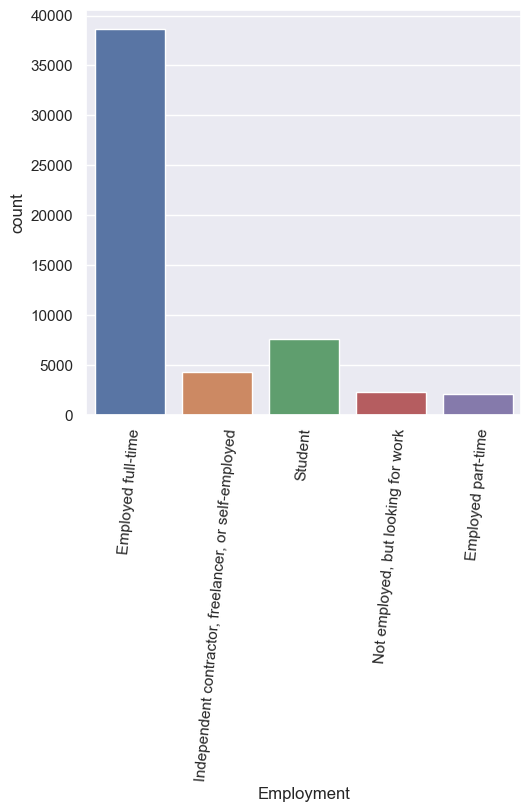

In [56]:
plt.figure(figsize=(5,5))
plt.xticks(rotation = 85)
sns.countplot(x="Employment", data=df);

##### What is the total salary for each Employment type?

In [57]:
emp_grp = df.groupby("Employment")
emp_sal_agg = emp_grp["Salary"].sum().round()

emp_sal_agg = emp_sal_agg.reset_index()

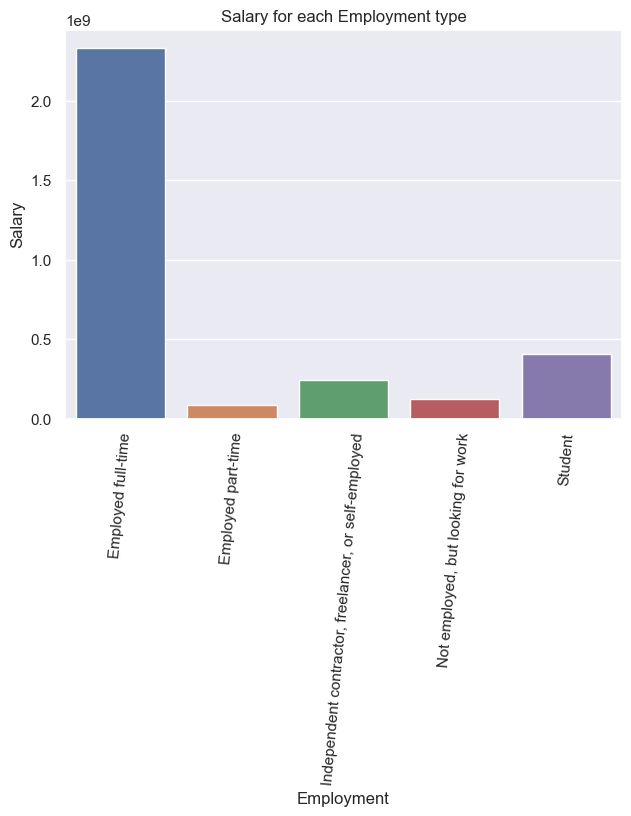

In [58]:
sns.barplot(x="Employment", y="Salary", data=emp_sal_agg)
plt.title("Salary for each Employment type")
plt.xticks(rotation = 85);

##### What is the average years of experience for each Employment type?

In [59]:
emp_exp_agg = emp_grp["YearsCodePro"].mean().round()

emp_exp_agg = emp_exp_agg.reset_index()

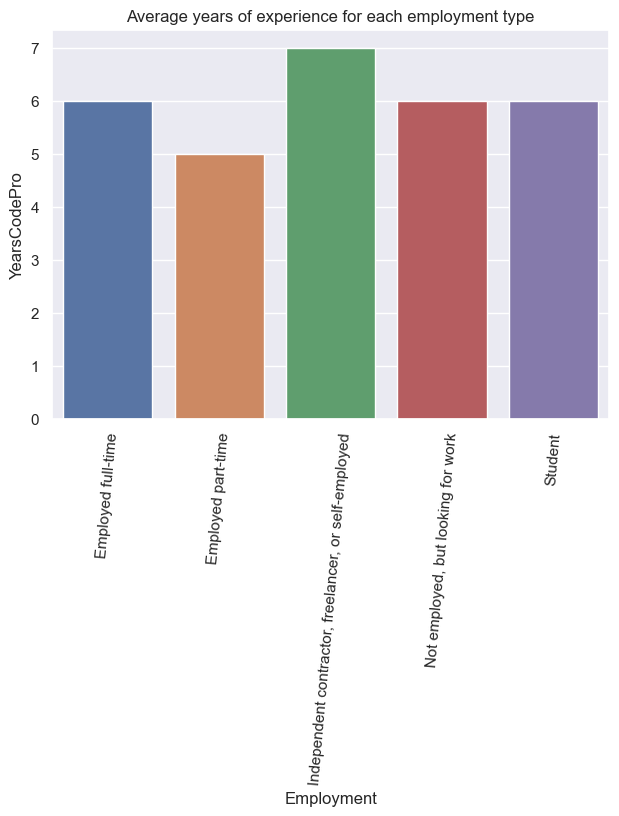

In [60]:
sns.barplot(x="Employment", y="YearsCodePro", data=emp_exp_agg)
plt.title("Average years of experience for each employment type")
plt.xticks(rotation = 85);

##### The distrubtion of the YearsCodePro column:

In [61]:
df.head(2)

,EdLevel,Employment,LanguageWorkedWith,YearsCodePro,Salary,LanguageWorkedWith_Count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,JavaScript;Swift,4.0,54049.0,2.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,HTML/CSS;Ruby;SQL,8.0,54049.0,4.0


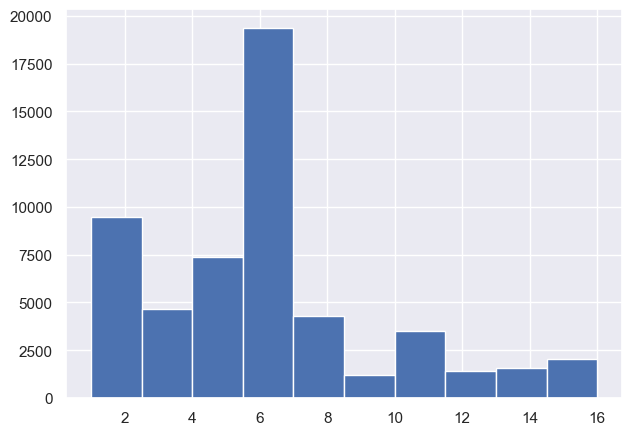

In [62]:
plt.hist(df["YearsCodePro"]);

##### The relationship between Years of experience and salary:

Text(0, 0.5, 'Salary')

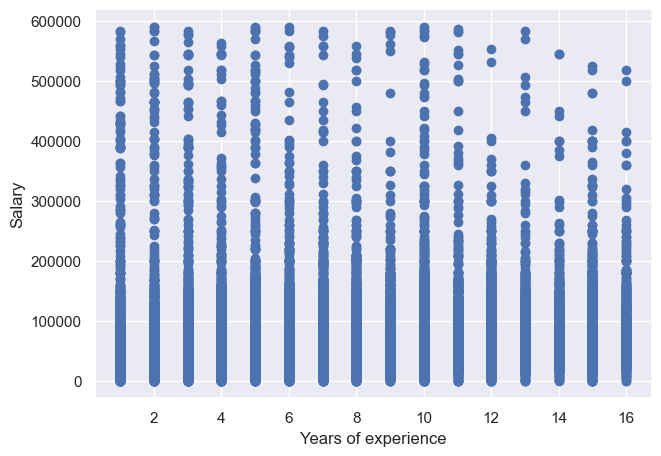

In [63]:
plt.scatter(df["YearsCodePro"], df["Salary"])
plt.xlabel("Years of experience")
plt.ylabel("Salary")

##### The relationship between the language worked with count and salary:

Text(0, 0.5, 'Salary')

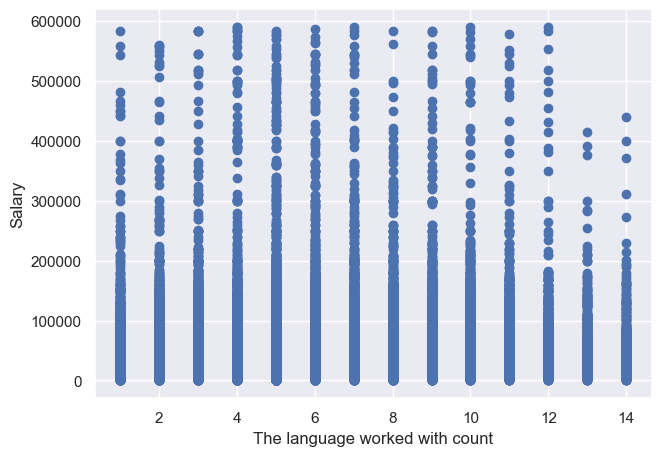

In [64]:
plt.scatter(df["LanguageWorkedWith_Count"], df["Salary"])
plt.xlabel("The language worked with count")
plt.ylabel("Salary")

## Preprocessing for machine learning:

In [65]:
df.columns

Index(['EdLevel', 'Employment', 'LanguageWorkedWith', 'YearsCodePro', 'Salary',
       'LanguageWorkedWith_Count'],
      dtype='object')

#####  Drop columns we don't need any more:

In [66]:
df.drop(columns="LanguageWorkedWith", axis=1, inplace=True)

In [67]:
df.head()

,EdLevel,Employment,YearsCodePro,Salary,LanguageWorkedWith_Count
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,4.0,54049.0,2.0
4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,8.0,54049.0,4.0
5,"Secondary school (e.g. American high school, G...",Employed full-time,4.0,54049.0,4.0
6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,4.0,54049.0,4.0
7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,13.0,116000.0,2.0


##### Encoding our categorical columns

In [68]:
encoder = LabelEncoder()

df["EdLevel"] = encoder.fit_transform(df["EdLevel"])
df["Employment"] = encoder.fit_transform(df["Employment"])

In [69]:
# Check the dataframe after encoding:
df.head()

,EdLevel,Employment,YearsCodePro,Salary,LanguageWorkedWith_Count
1,1,0,4.0,54049.0,2.0
4,1,0,8.0,54049.0,4.0
5,7,0,4.0,54049.0,4.0
6,1,0,4.0,54049.0,4.0
7,1,0,13.0,116000.0,2.0


##### Transforming the distribution of the " Item_Outlet_Sales" column to increase the model performance:

In [70]:
df["Salary"] = np.sqrt(df["Salary"])

C:\Users\User\anaconda4new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


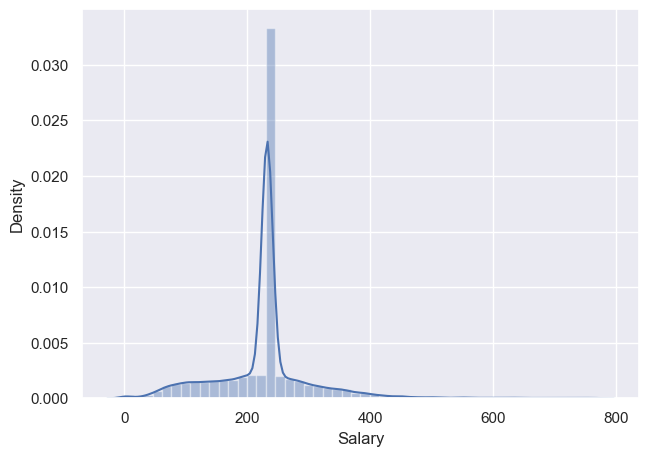

In [71]:
sns.distplot(df["Salary"]);

##### Creating X & Y Variable:

In [72]:
x = df.drop(columns="Salary", axis =1)
y = df["Salary"]

print(x)
print(y)

       EdLevel  Employment  YearsCodePro  LanguageWorkedWith_Count
1            1           0           4.0                       2.0
4            1           0           8.0                       4.0
5            7           0           4.0                       4.0
6            1           0           4.0                       4.0
7            1           0          13.0                       2.0
...        ...         ...           ...                       ...
64454        2           4           6.0                       5.0
64455        1           3           6.0                       5.0
64456        3           0           1.0                       5.0
64459        1           0           6.0                       2.0
64460        4           0           6.0                       6.0

[54839 rows x 4 columns]
1        232.484408
4        232.484408
5        232.484408
6        232.484408
7        340.587727
            ...    
64454    232.484408
64455    232.484408
64456    2

In [73]:
np.sqrt(54049)

232.48440807933767

##### Creating train and test data:

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state=1)

## Training the machine learning model: 
We will try multiple regression models and then choose the best one with the least error value.

##### Linear regression model from scikit-learn:

In [75]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

##### Predicting on the training data and evaluating the model:

In [76]:
train_pred_1 = lin_reg.predict(x_train)

In [77]:
mae = metrics.mean_absolute_error(y_train,train_pred_1)
mse = metrics.mean_squared_error(y_train, train_pred_1)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

47.750540761844526
6051.7889393700225
77.79324481836467


##### Predicting on the test data and evaluating the model:

In [78]:
# Predicting
test_pred_1 = lin_reg.predict(x_test)

In [79]:
# Evaluating:
mae = metrics.mean_absolute_error(y_test,test_pred_1)
mse = metrics.mean_squared_error(y_test, test_pred_1)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

47.15417161777037
5949.51450266717
77.13309602671976


##### Decision Tree Regressor model from scikit-learn:

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
tree_reg = DecisionTreeRegressor(random_state=1)

tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

##### Predicting on the training data and evaluating the model:

In [82]:
# Predicting:
train_pred_2 = tree_reg.predict(x_train)

In [83]:
# evaluating:

mae = metrics.mean_absolute_error(y_train,train_pred_2)
mse = metrics.mean_squared_error(y_train, train_pred_2)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

40.15758870405209
4777.265827082926
69.11776781033171


##### Predicting on the test data and evaluating the model:

In [84]:
# Predicting:
test_pred_2 = tree_reg.predict(x_test)

In [85]:
# Evaluating:

mae = metrics.mean_absolute_error(y_test,test_pred_2)
mse = metrics.mean_squared_error(y_test, test_pred_2)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

51.52640676013688
7202.005061278431
84.86462785683109


##### Random Forest Regressor model from scikit-learn:

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rand_reg = RandomForestRegressor(random_state=1)

rand_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

##### Predicting on the training data and evaluating the model:

In [88]:
# Predicting:
train_pred_3 = rand_reg.predict(x_train)

In [89]:
# Evaluating: 

mae = metrics.mean_absolute_error(y_train,train_pred_3)
mse = metrics.mean_squared_error(y_train, train_pred_3)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

41.92435969712852
4869.792392307499
69.78389780105077


##### Predicting on the test data and evaluating the model:

In [90]:
# Predicting:
test_pred_3 = rand_reg.predict(x_test)

In [91]:
 # Evaluating:

mae = metrics.mean_absolute_error(y_test,test_pred_3)
mse = metrics.mean_squared_error(y_test, test_pred_3)
rmse = np.sqrt(mse)


print(mae)
print(mse)
print(rmse)

49.60882231021249
6591.847404126332
81.19019278291148


##### From what we see above, the best regression model was the first model, which achived the least error value.

## Note:
This model will be deployed and available for end user very soon!!.

In [92]:
import pickle

In [93]:
filename = "Developers salary prediction.sav"

pickle.dump(lin_reg,open(filename,"wb"))